In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax;
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
%matplotlib inline
import scipy.special 
import random
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import torch.utils.data as data_utils
import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
housing_sales_data = pd.read_csv("/content/drive/MyDrive/Ames_Housing_Sales.csv")

# **Exploratory Data Analysis**

In [ ]:
housing_sales_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [ ]:
housing_sales_data.shape

(1379, 80)

In [ ]:
housing_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [ ]:
housing_sales_data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [ ]:
housing_sales_data.iloc[:,:].describe(exclude='object')

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


In [ ]:
housing_sales_data.describe(include='object').iloc[:,:]

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
count,1379,1379,1379,1379,1379,1379,1379,1379,1379,1379,...,1379,1379,1379,1379,1379,1379,1379,1379,1379,1379
unique,3,5,4,5,6,7,5,2,9,8,...,5,25,3,4,8,6,6,9,2,2
top,None,1Fam,TA,No,None,Unf,TA,Y,Norm,Norm,...,None,NAmes,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
freq,1297,1166,889,582,426,790,442,1310,1195,1365,...,1328,219,1293,1372,1354,1070,1137,1194,1374,1378


In [ ]:
housing_sales_data.apply(pd.value_counts)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0.0,NaN,777.0,1355.0,NaN,6.0,NaN,NaN,NaN,426.0,1216.0,...,1263.0,NaN,NaN,30.0,NaN,701.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,334.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,775.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,199.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WdShake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WdShing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WdShngl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
housing_sales_data.apply(pd.value_counts).index

Index([      0.0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,
       ...
       'VinylSd',      'WD',    'Wall', 'Wd Sdng', 'Wd Shng', 'WdShake',
       'WdShing', 'WdShngl',    'Wood',       'Y'],
      dtype='object', length=3993)

### **Number of "None" values for different features**

In [ ]:
empty_values = pd.DataFrame(housing_sales_data.apply(pd.value_counts).loc["None"])
empty_values.dropna()

,None
Alley,1297.0
BsmtCond,426.0
BsmtExposure,426.0
BsmtFinType1,426.0
BsmtFinType2,427.0
BsmtQual,426.0
Fence,1114.0
FireplaceQu,618.0
MasVnrType,797.0
MiscFeature,1328.0


In [ ]:
# First in location we are looking at the number of sales by neighborhood.
neigh = housing_sales_data['Neighborhood'].value_counts()
neigh

NAmes      219
CollgCr    148
OldTown    101
Somerst     86
Gilbert     79
Edwards     78
NridgHt     77
NWAmes      73
Sawyer      71
SawyerW     58
Crawfor     51
BrkSide     48
Mitchel     44
NoRidge     41
Timber      38
IDOTRR      29
ClearCr     27
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

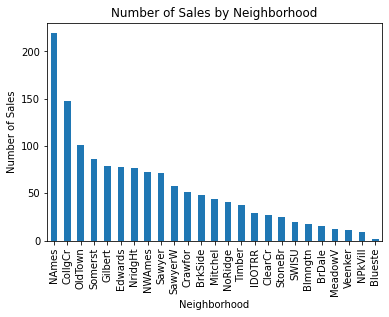

In [ ]:
#  Lets graph sales by neighborhood
neigh.plot(kind = 'bar')
plt.title("Number of Sales by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Sales")
plt.show()

In [ ]:
#  Now we will pull in average sales price by neighborhood.

avg_neigh = housing_sales_data[['Neighborhood', 'SalePrice']].groupby('Neighborhood').agg(['count', 'mean'])

avg_neigh = round(avg_neigh, 2)

avg_neigh.sort_values(by = ('SalePrice', 'mean'), ascending = False)

SalePrice           
                 count       mean
Neighborhood                     
NoRidge             41  335295.32
NridgHt             77  316270.62
StoneBr             25  310499.00
Timber              38  242247.45
Veenker             11  238772.73
Somerst             86  225379.84
ClearCr             27  213012.30
Crawfor             51  210624.73
CollgCr            148  198968.01
Blmngtn             17  194870.88
Gilbert             79  192854.51
NWAmes              73  189050.07
SawyerW             58  187341.24
Mitchel             44  160937.18
NAmes              219  146445.86
NPkVill              9  142694.44
SWISU               20  141844.20
Sawyer              71  138199.89
Blueste              2  137500.00
Edwards             78  134758.59
BrkSide             48  134126.56
OldTown            101  132165.44
IDOTRR              29  105471.72
BrDale              15  105360.00
MeadowV             12  103816.67

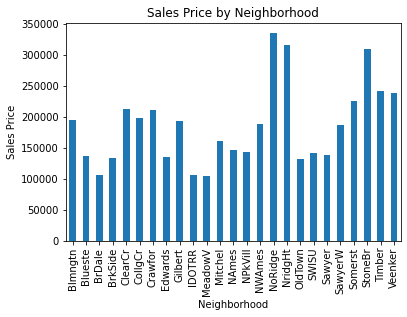

In [ ]:
#  Lets have a look at sales price by neighborhood in a bar graph
avg_neigh[('SalePrice',  'mean')].plot(kind = 'bar')
plt.title("Sales Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sales Price")
plt.show()

Landmrk neighborhood has only one and Greens neighborhood has only 2 sales but neither seem outliers in terms of price. Here we can see average sales price in NoRidge neighborhood are more than 3x the avg sales price in MeadowV. Given this finding it is likely the neighborhood will influence the sales price.

### Distribution of sales prices

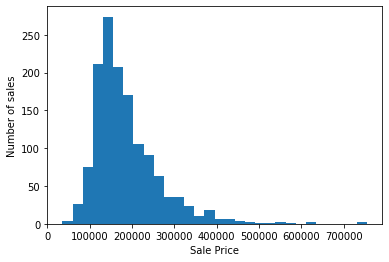

In [ ]:
plt.hist(housing_sales_data['SalePrice'], bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Number of sales")
plt.show()

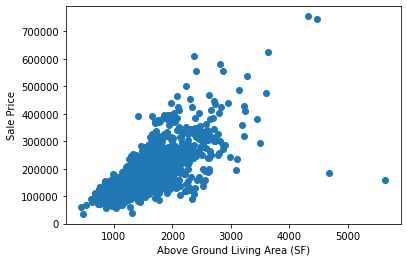

In [ ]:
plt.scatter(housing_sales_data['GrLivArea'], housing_sales_data['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above Ground Living Area (SF)')
plt.show()

4 examples are outliers. (above 4000)

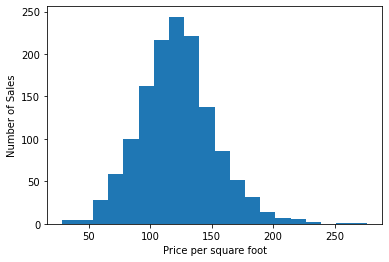

In [ ]:
housing_sales_data['PerSquareFoot'] = housing_sales_data['SalePrice']/housing_sales_data['GrLivArea']
plt.hist(housing_sales_data['PerSquareFoot'], bins=20)
plt.ylabel('Number of Sales')
plt.xlabel('Price per square foot')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


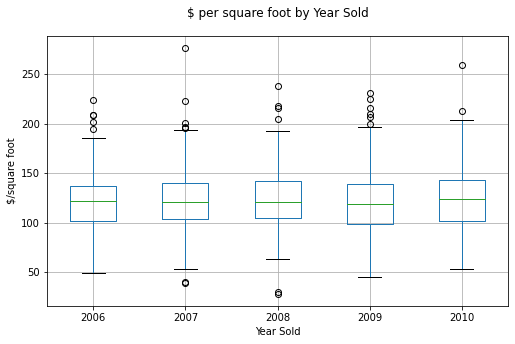

In [ ]:
housing_sales_data.boxplot(column=["PerSquareFoot"], by=['YrSold'], figsize=(8,5))
plt.suptitle('$ per square foot by Year Sold')
plt.title('')
plt.ylabel('$/square foot')
plt.xlabel('Year Sold')
plt.show()

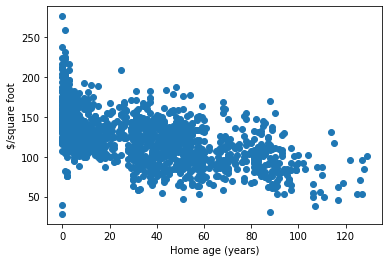

In [ ]:
housing_sales_data['Age'] = housing_sales_data['YrSold'] - housing_sales_data['YearBuilt']
plt.scatter(housing_sales_data['Age'], housing_sales_data['PerSquareFoot'])
plt.ylabel('$/square foot')
plt.xlabel('Home age (years)')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


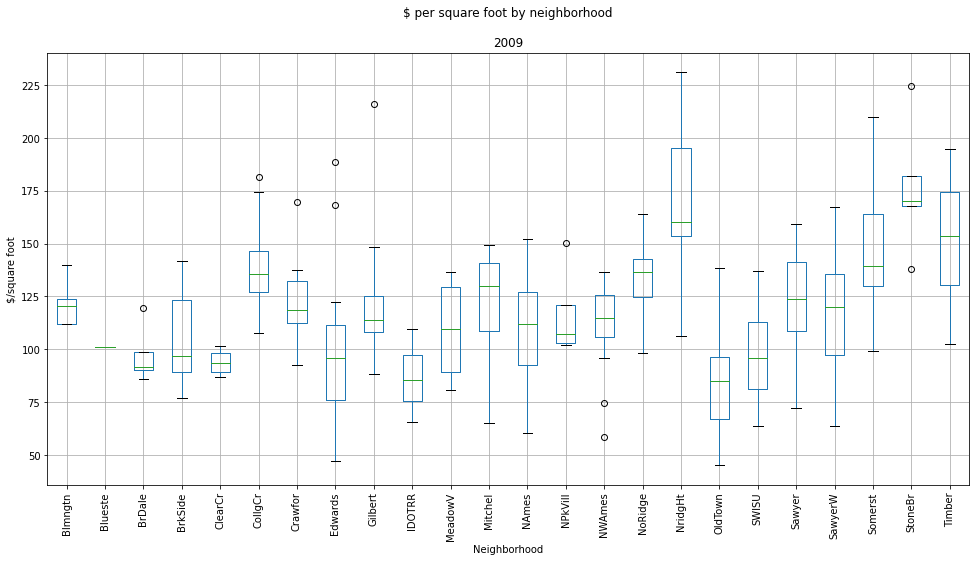

In [ ]:
housing_sales_data[housing_sales_data["YrSold"]== 2009].boxplot(column=['PerSquareFoot'], by=['Neighborhood'], figsize=(16,8), rot=90)
plt.suptitle('$ per square foot by neighborhood')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Neighborhood')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


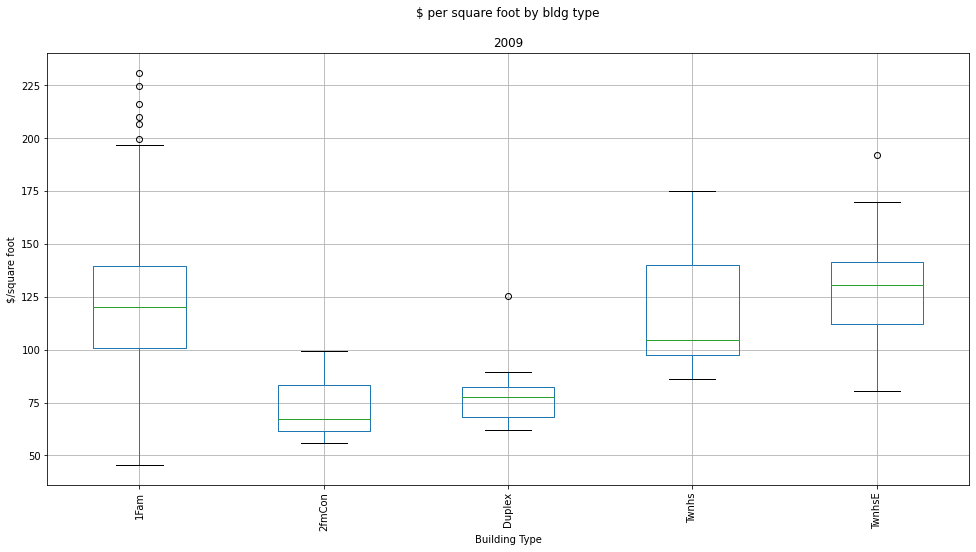

In [ ]:
housing_sales_data[housing_sales_data["YrSold"]== 2009].boxplot(column=['PerSquareFoot'], by=['BldgType'], figsize=(16,8), rot=90)
plt.suptitle('$ per square foot by bldg type')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Building Type')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


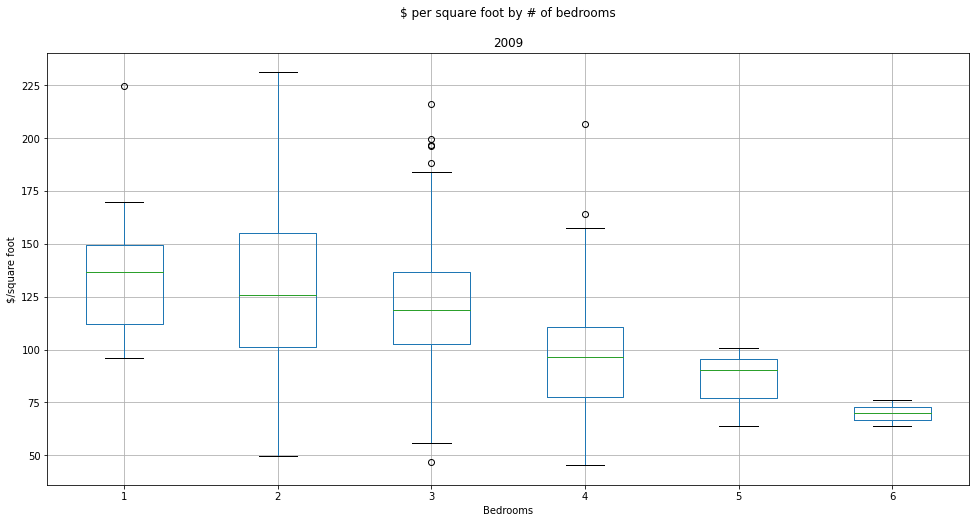

In [ ]:
housing_sales_data[housing_sales_data["YrSold"]== 2009].boxplot(column=['PerSquareFoot'], by=['BedroomAbvGr'], figsize=(16,8))
plt.suptitle('$ per square foot by # of bedrooms')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Bedrooms')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


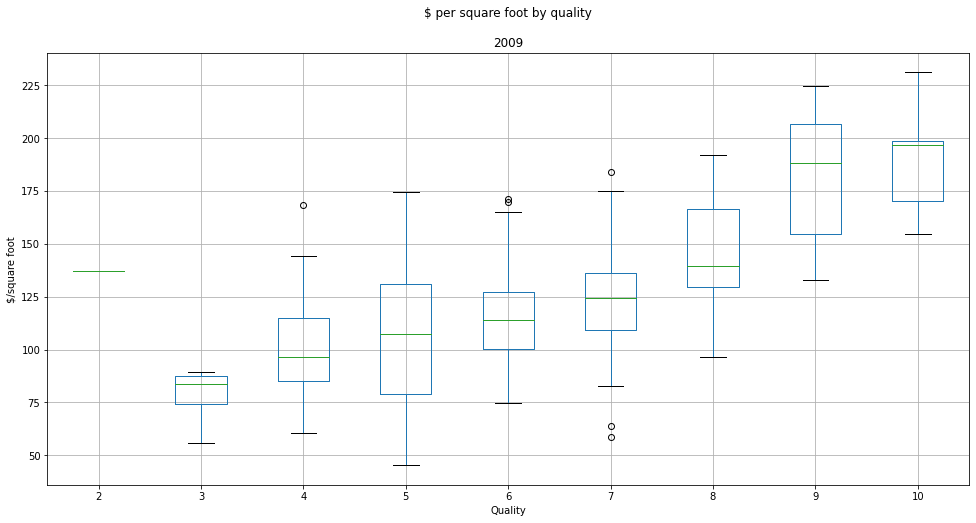

In [ ]:
housing_sales_data[housing_sales_data["YrSold"]== 2009].boxplot(column=['PerSquareFoot'], by=['OverallQual'], figsize=(16,8))
plt.suptitle('$ per square foot by quality')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Quality')
plt.show()

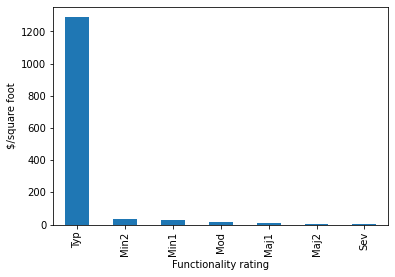

In [ ]:
housing_sales_data['Functional'].value_counts().plot(kind='bar')
plt.ylabel('$/square foot')
plt.xlabel('Functionality rating')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


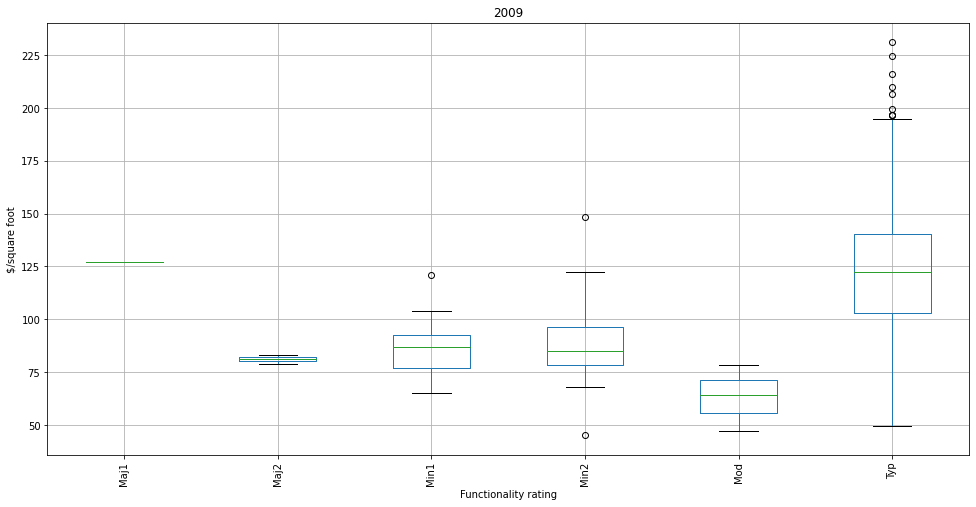

In [ ]:
housing_sales_data[housing_sales_data["YrSold"]== 2009].boxplot(column=['PerSquareFoot'], by=['Functional'], figsize=(16,8), rot=90)
plt.suptitle('')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Functionality rating')
plt.show()

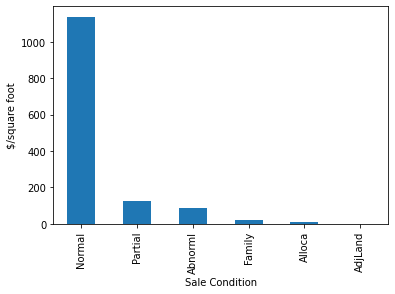

In [ ]:
housing_sales_data['SaleCondition'].value_counts().plot(kind='bar')
plt.ylabel('$/square foot')
plt.xlabel('Sale Condition')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


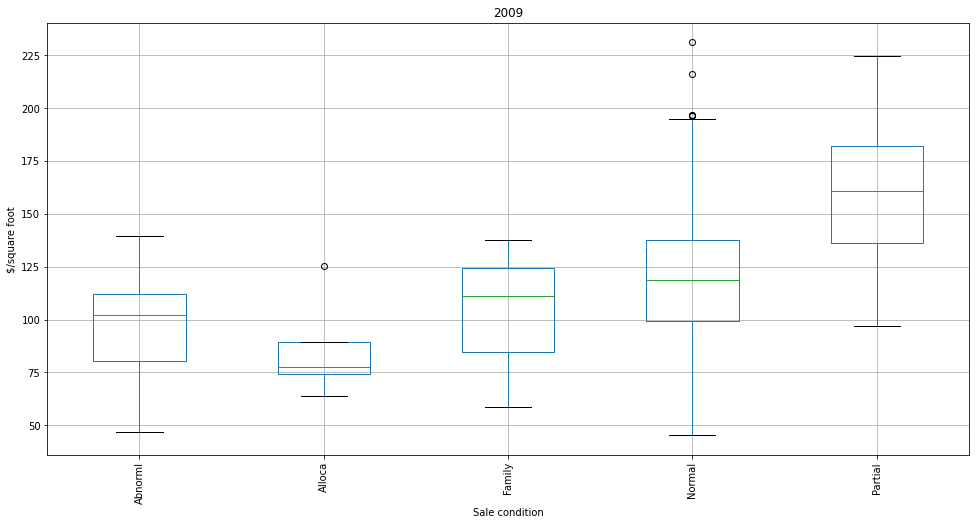

In [ ]:
housing_sales_data[housing_sales_data["YrSold"]== 2009].boxplot(column=['PerSquareFoot'], by=['SaleCondition'], figsize=(16,8), rot=90)
plt.suptitle('')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Sale condition')
plt.show()

In [ ]:
corr = housing_sales_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.787228
GrLivArea        0.708172
GarageCars       0.637095
GarageArea       0.608405
TotalBsmtSF      0.603583
1stFlrSF         0.594935
PerSquareFoot    0.566773
FullBath         0.556550
TotRmsAbvGrd     0.538309
YearBuilt        0.507584
YearRemodAdd     0.505434
GarageYrBlt      0.486362
MasVnrArea       0.463139
Fireplaces       0.448877
BsmtFinSF1       0.375563
OpenPorchSF      0.333036
2ndFlrSF         0.313336
WoodDeckSF       0.312631
LotFrontage      0.281976
HalfBath         0.270721
LotArea          0.252921
BsmtFullBath     0.225988
BsmtUnfSF        0.213135
BedroomAbvGr     0.164655
ScreenPorch      0.099453
PoolArea         0.091518
MoSold           0.043749
3SsnPorch        0.039226
LowQualFinSF    -0.008364
MiscVal         -0.017933
BsmtFinSF2      -0.023243
BsmtHalfBath    -0.025651
YrSold          -0.026726
MSSubClass      -0.077707
OverallCond     -0.095278
EnclosedPorch   -0.120164
KitchenAbvGr    -0.135574
Age         

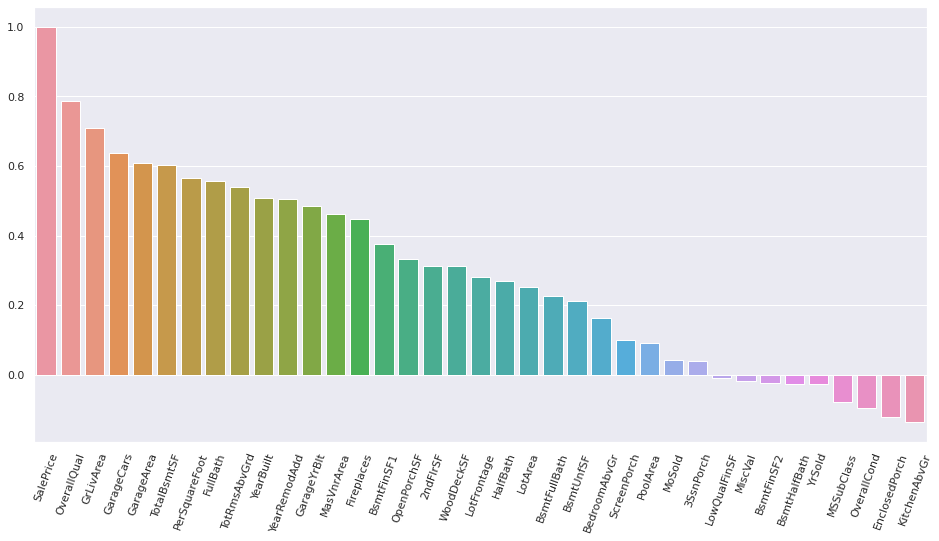

In [ ]:
correlated = housing_sales_data.corr()

sns.set(rc={'figure.figsize':(16,8)})
plt.xticks(rotation=70)
corr_plot = correlated[1:-1].SalePrice.sort_values(ascending=False)
sns.barplot(x = corr_plot.index, y=corr_plot.values)


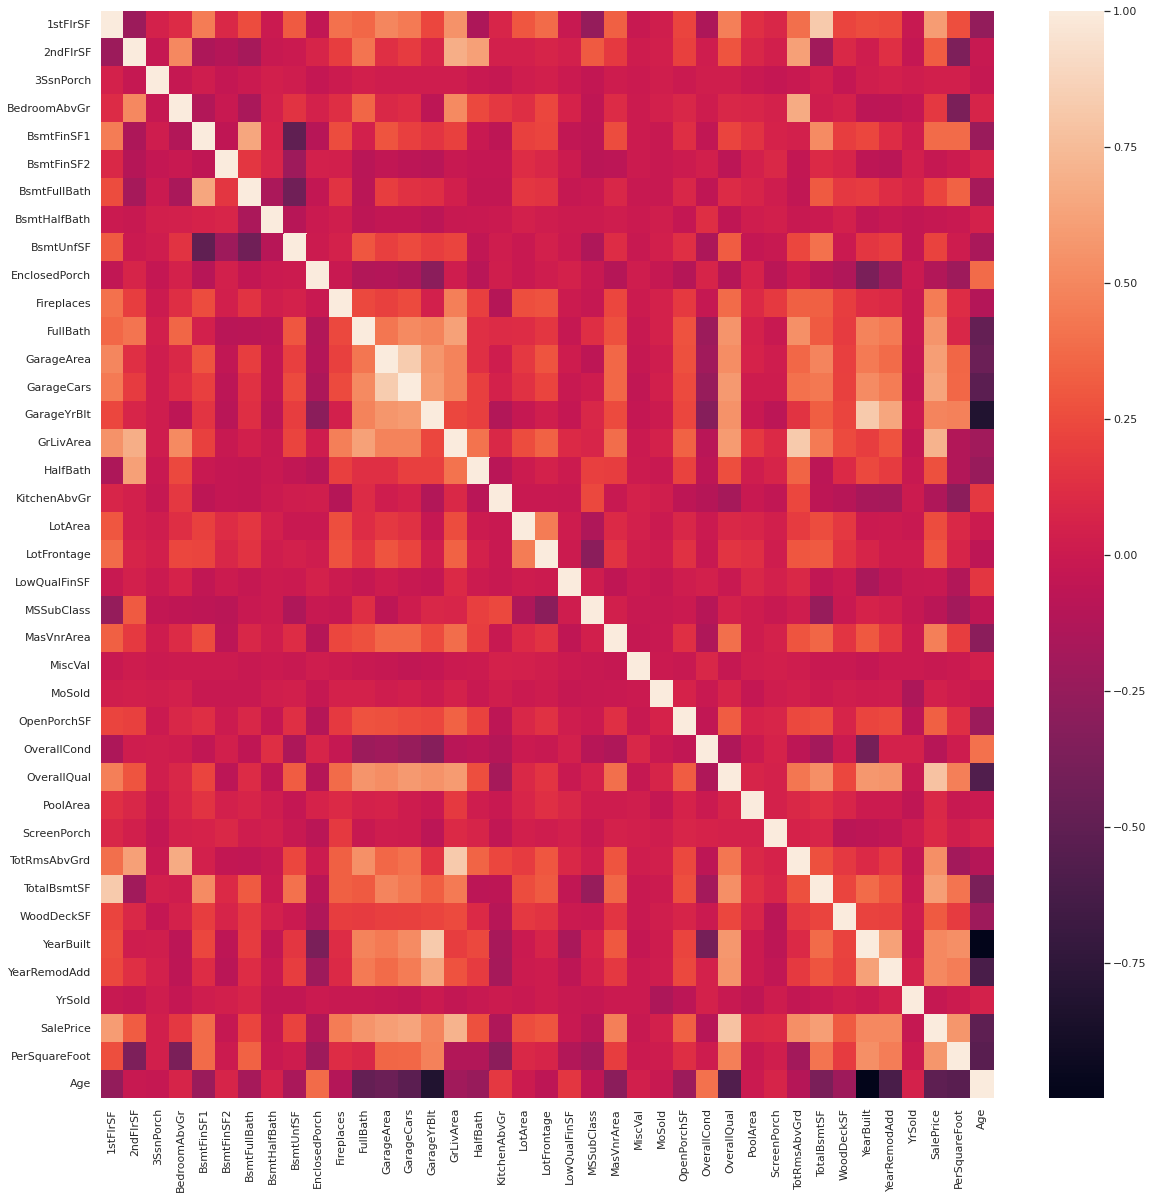

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(housing_sales_data.corr())

In [ ]:
#separate types of columns/features
categorical_features = housing_sales_data.select_dtypes(include = ["object"]).columns
numerical_features = housing_sales_data.select_dtypes(exclude = ["object"]).columns

In [ ]:
type(categorical_features)

pandas.core.indexes.base.Index

In [ ]:
num_list = numerical_features.tolist()
cat_list = categorical_features.tolist()

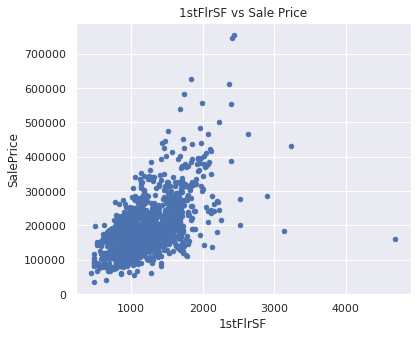

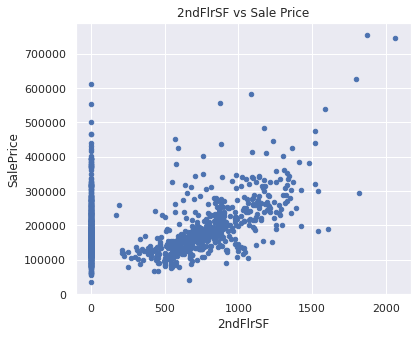

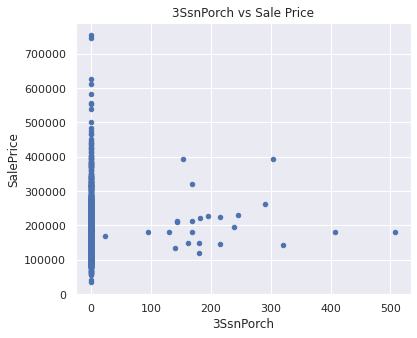

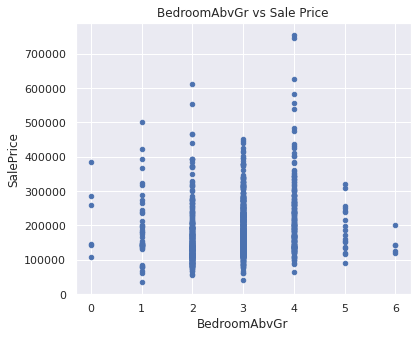

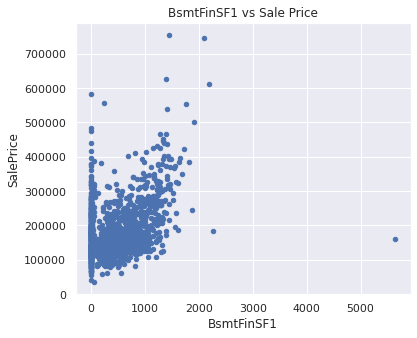

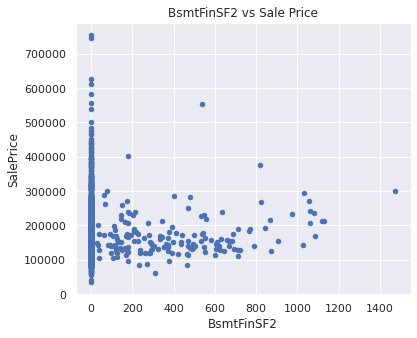

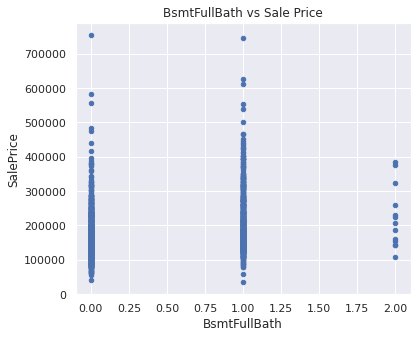

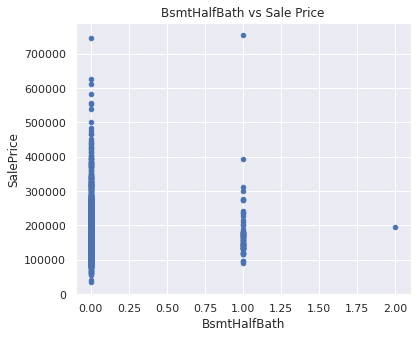

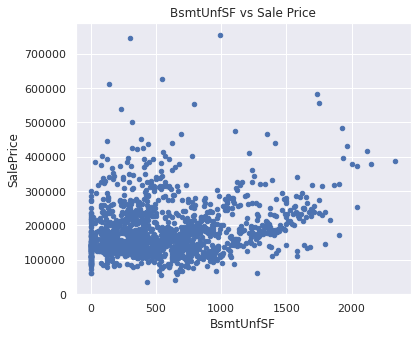

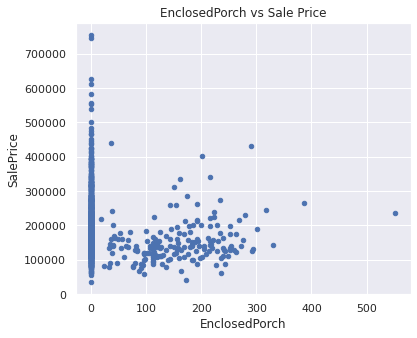

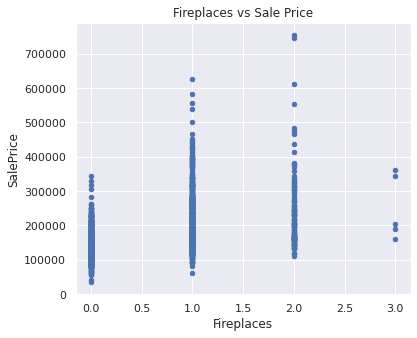

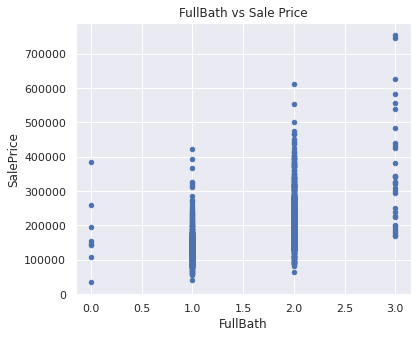

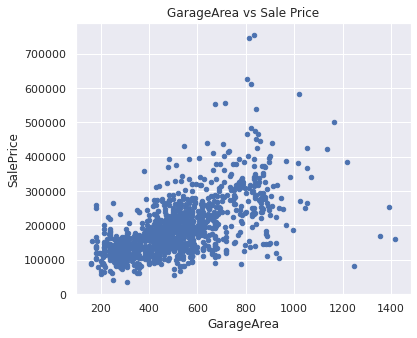

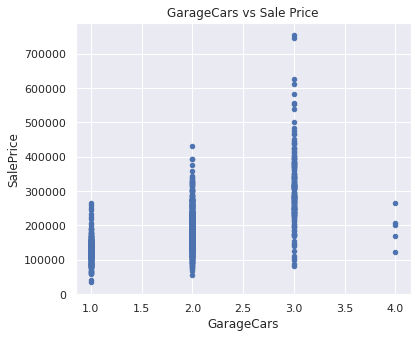

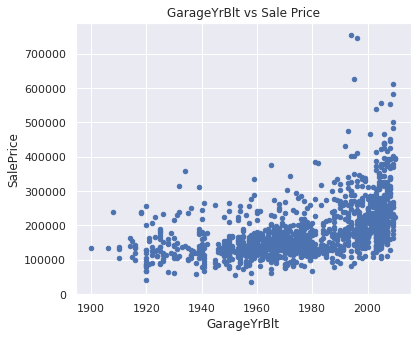

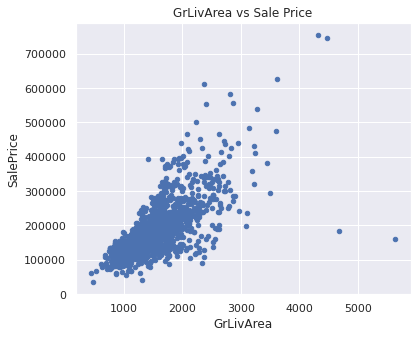

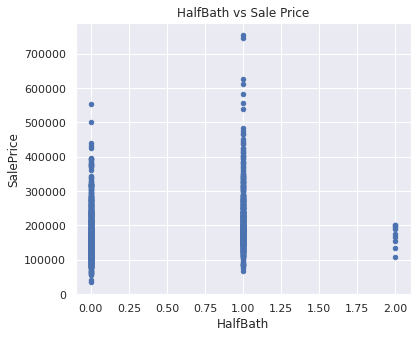

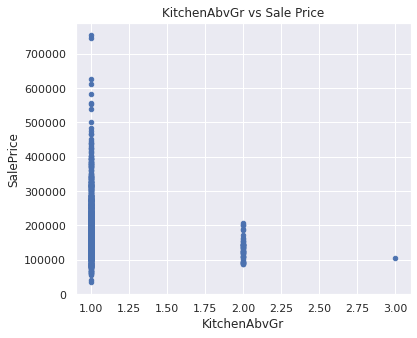

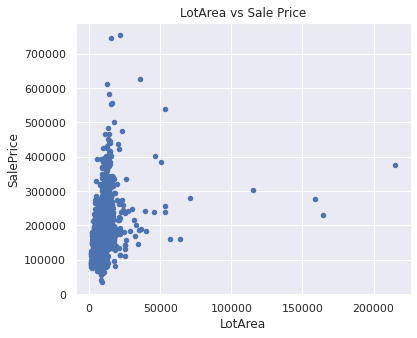

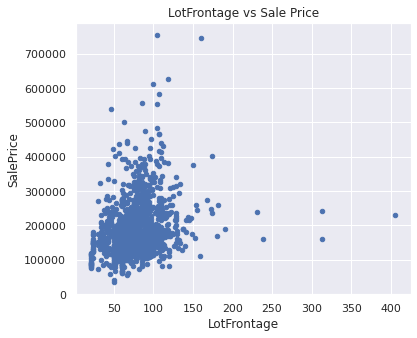

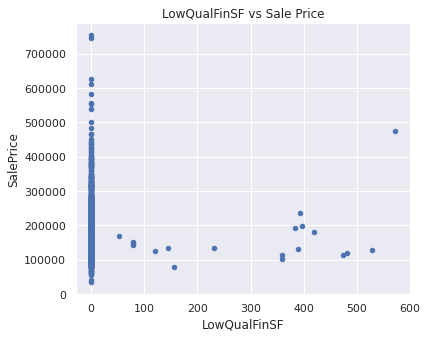

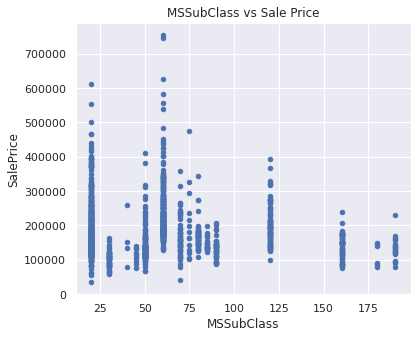

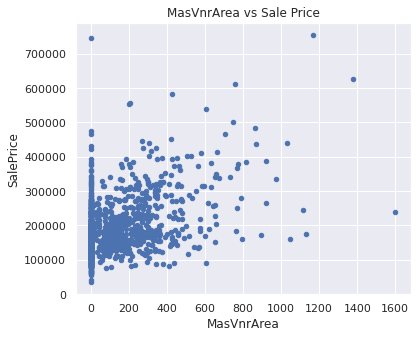

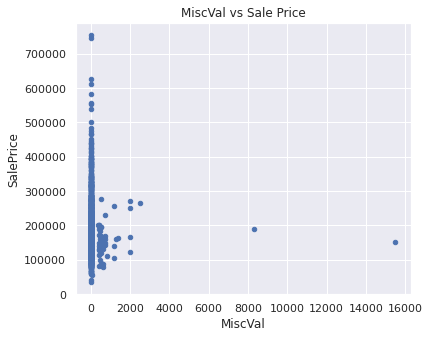

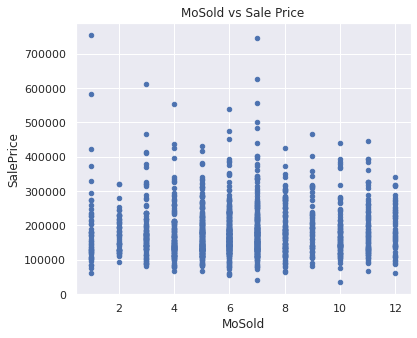

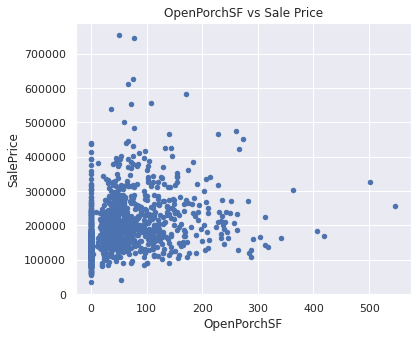

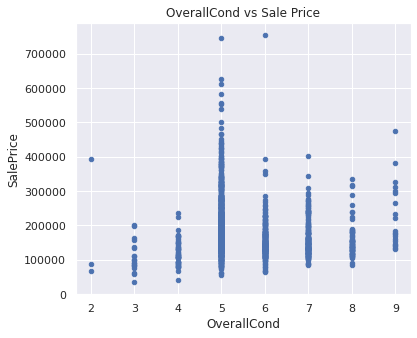

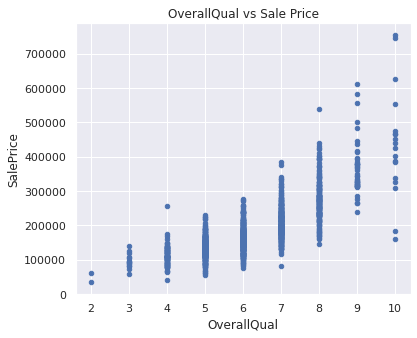

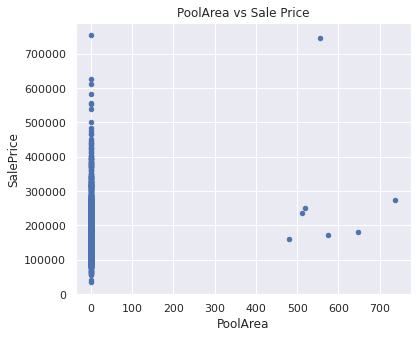

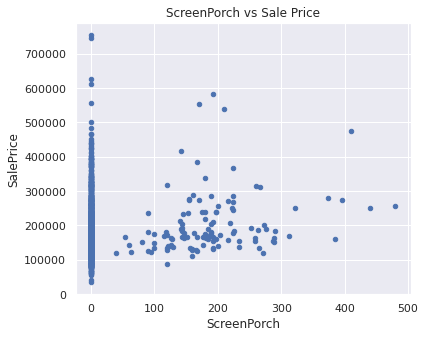

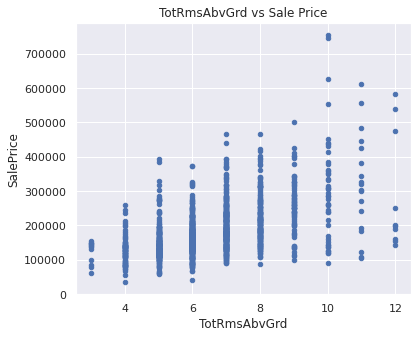

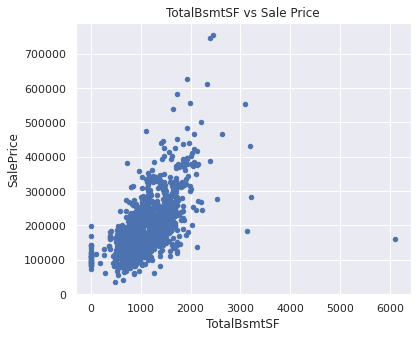

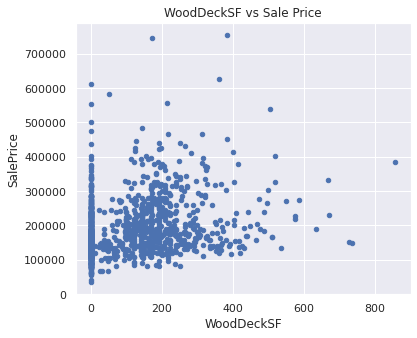

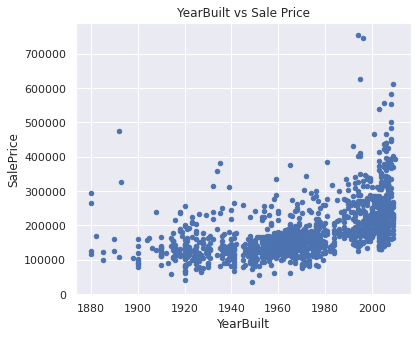

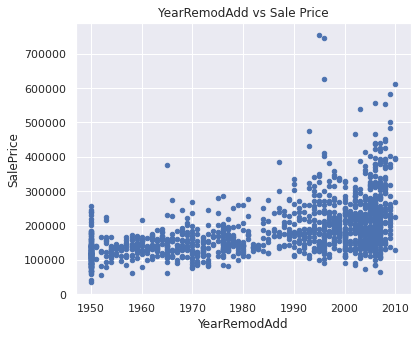

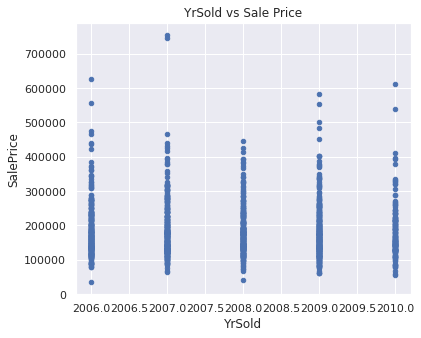

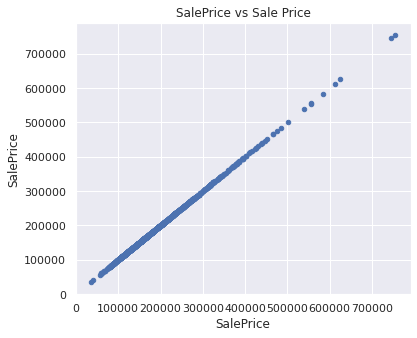

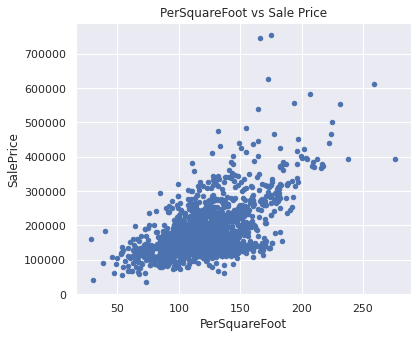

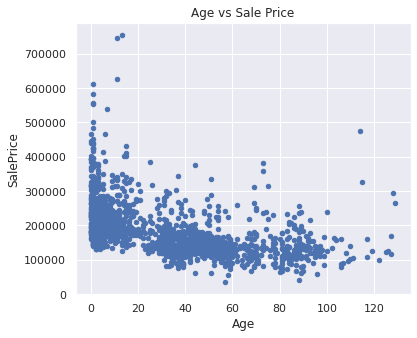

In [ ]:
#  Make some plots of our numeric variables
for item in num_list:
    housing_sales_data.plot(x = item, y = 'SalePrice', kind = 'scatter', figsize = (6, 5))
    plt.title(item + " vs Sale Price")
    plt.show()

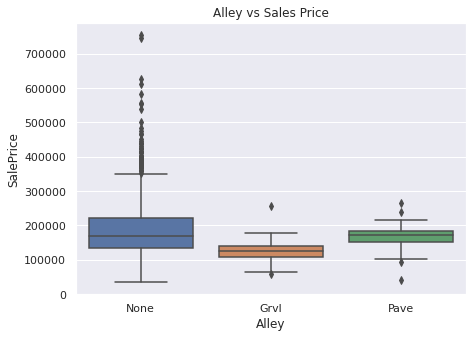

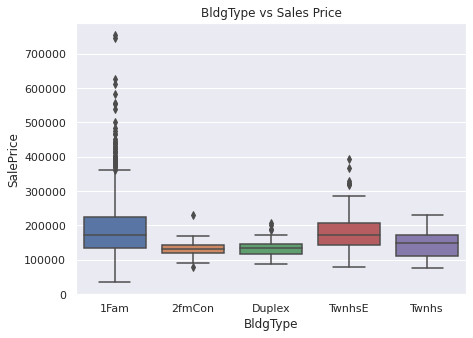

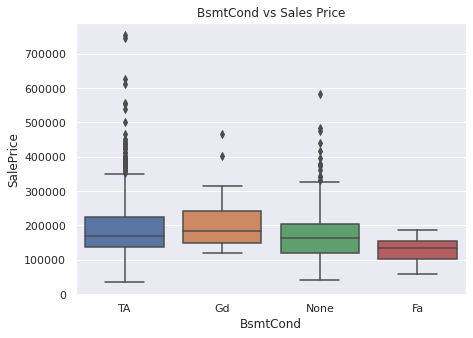

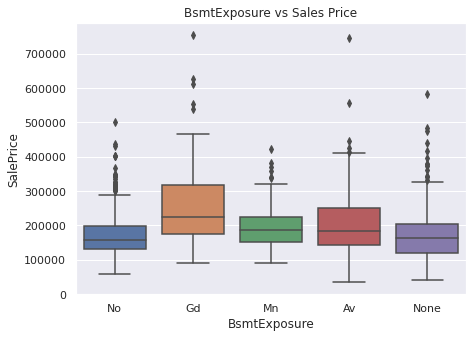

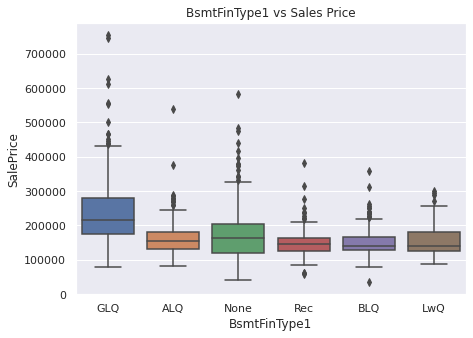

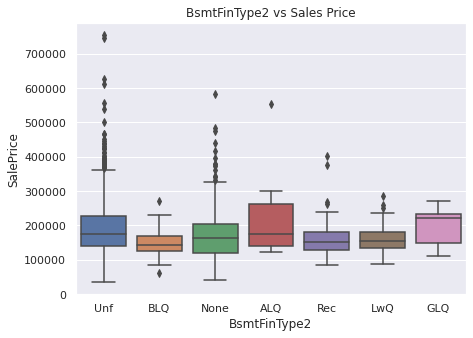

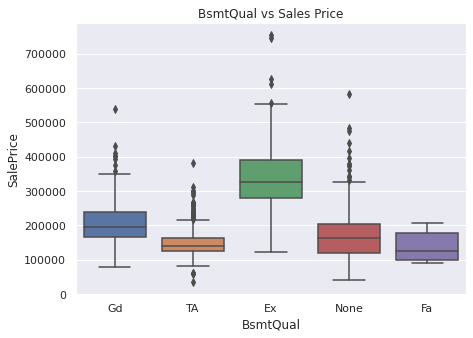

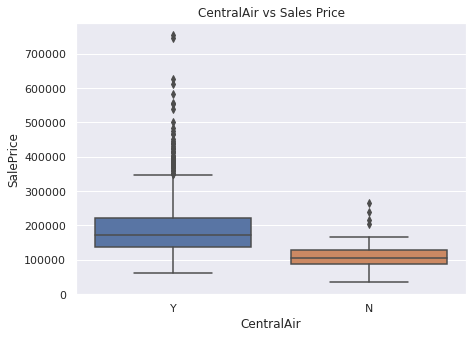

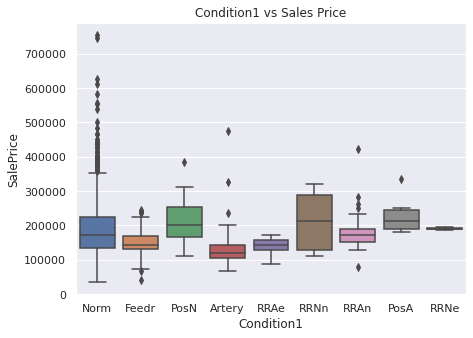

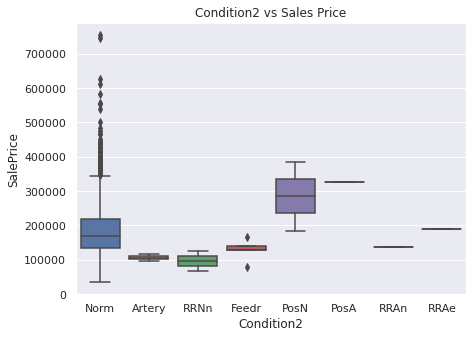

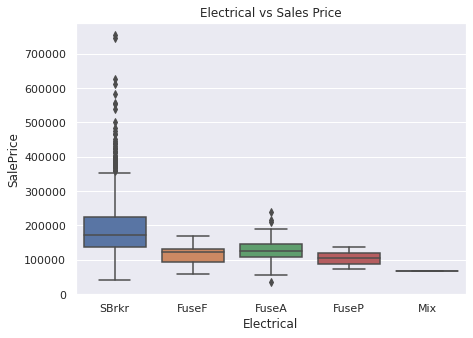

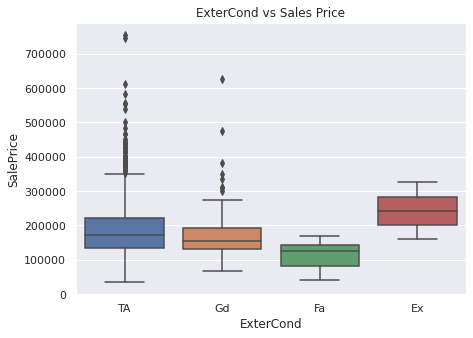

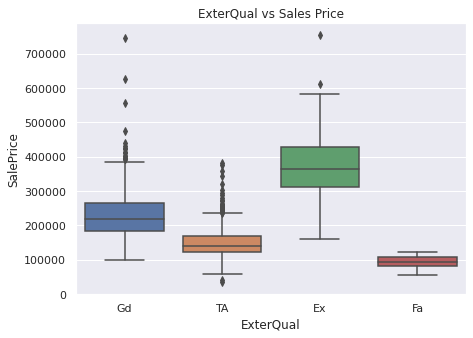

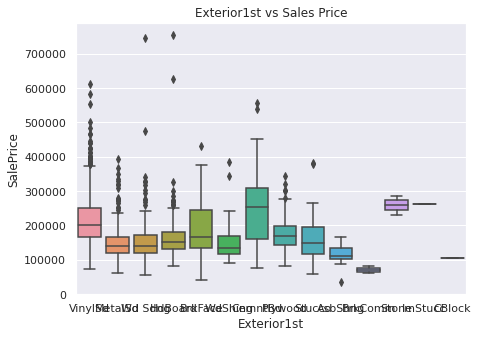

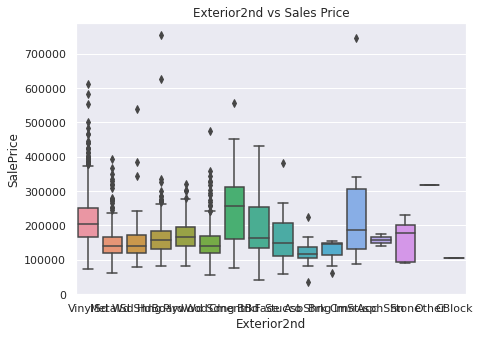

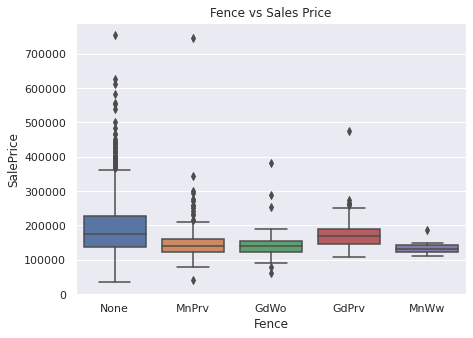

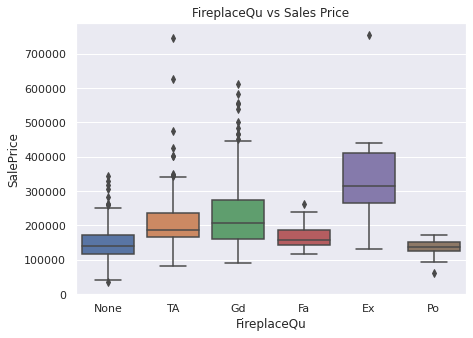

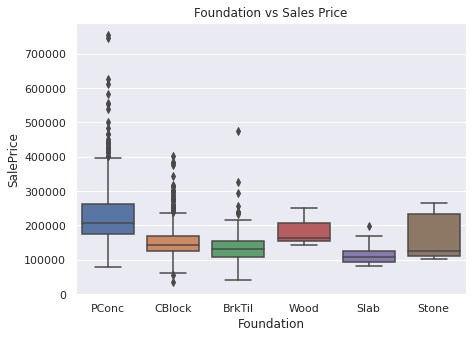

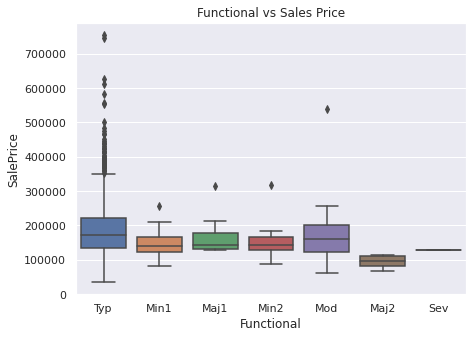

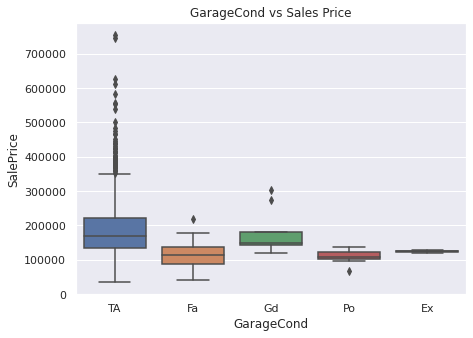

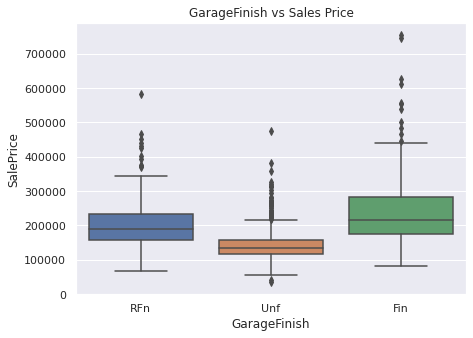

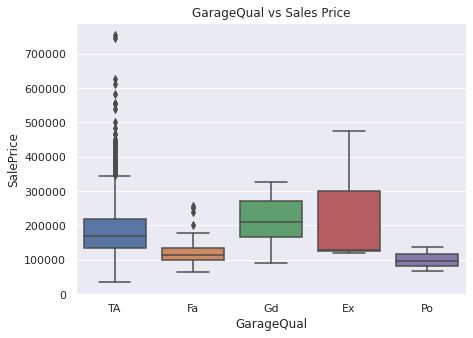

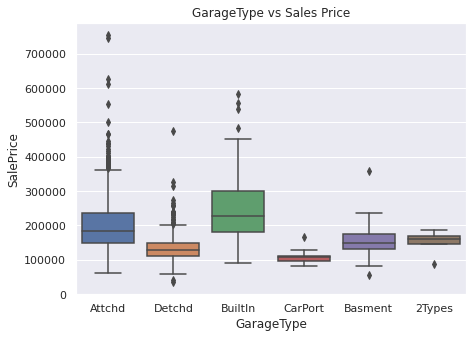

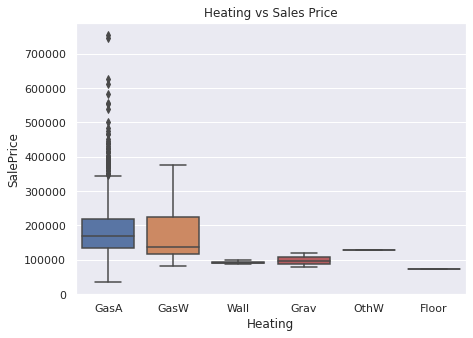

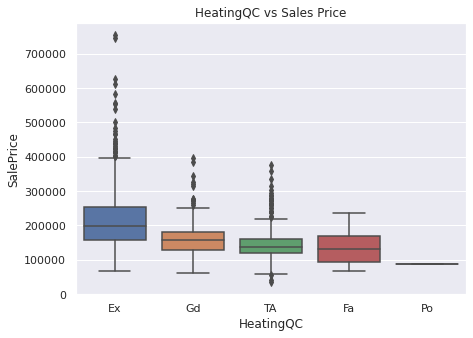

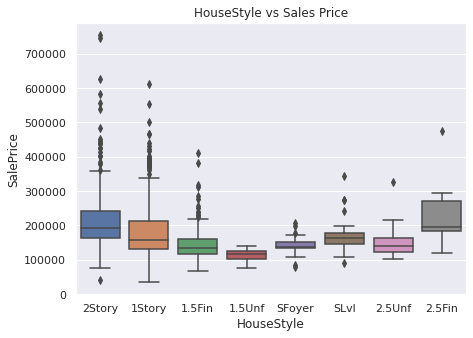

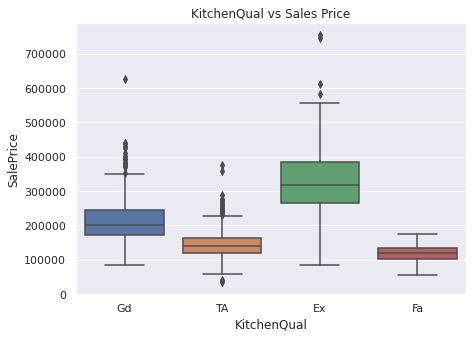

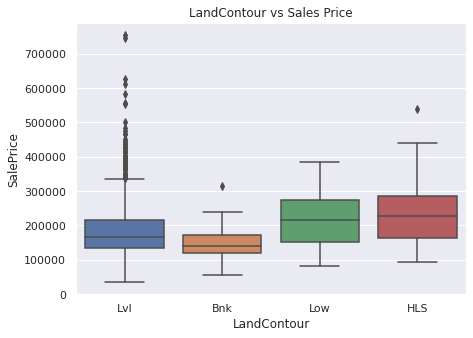

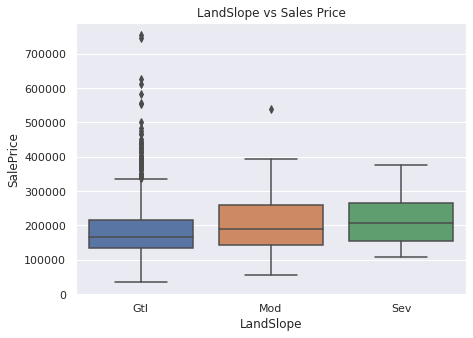

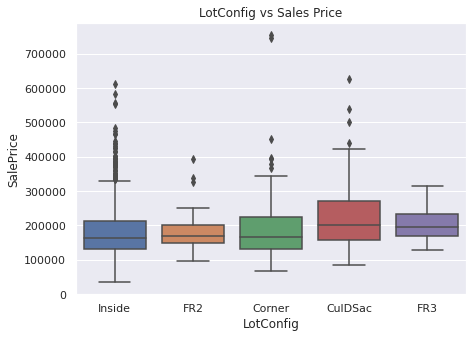

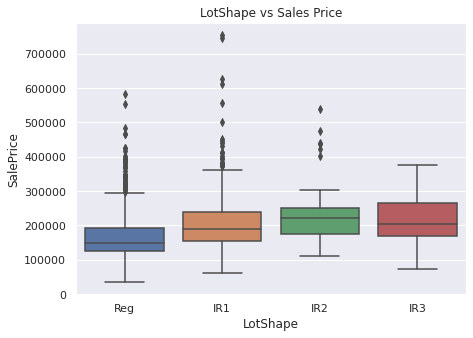

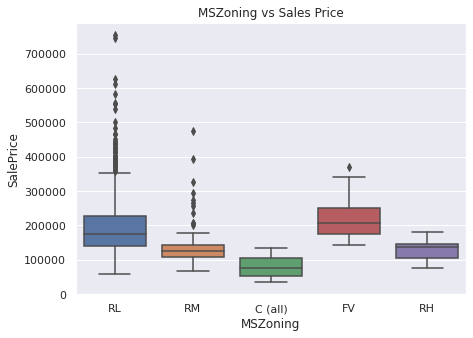

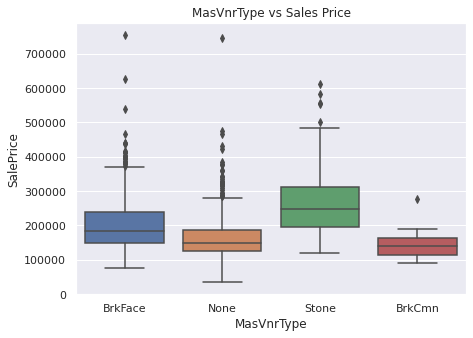

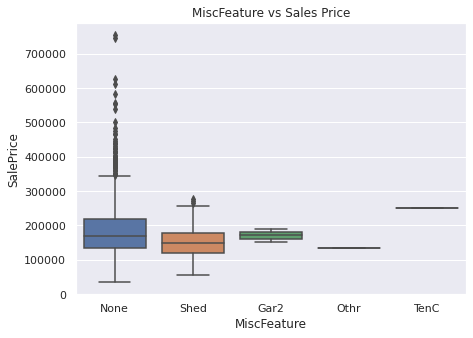

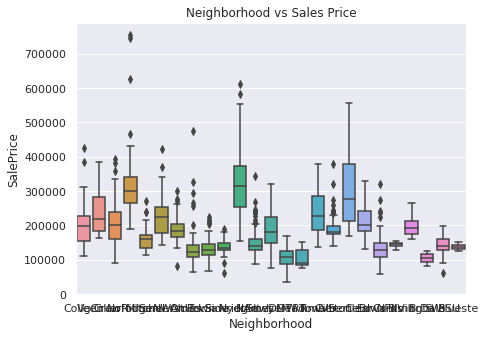

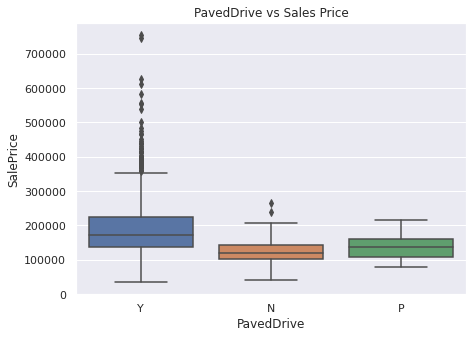

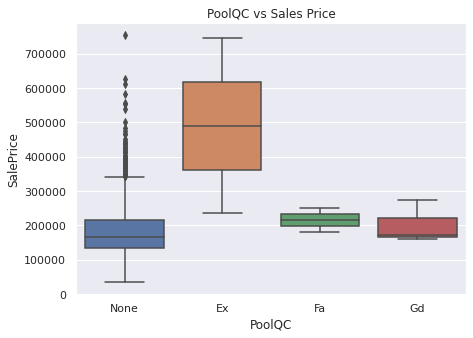

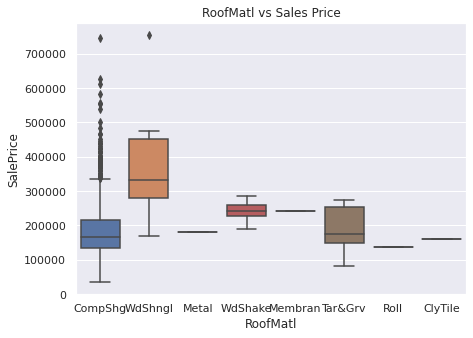

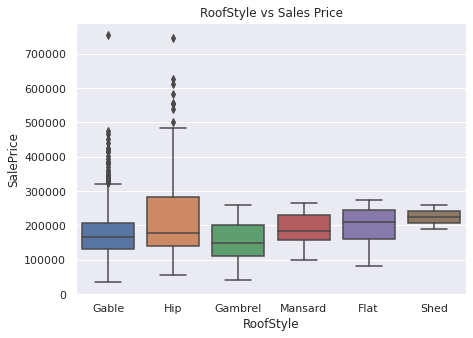

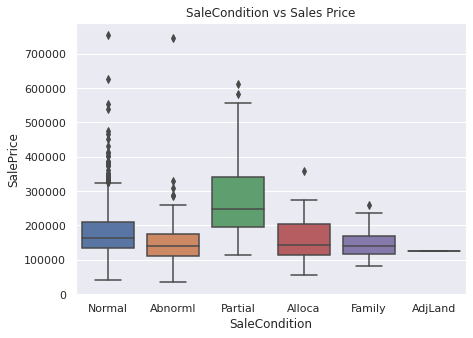

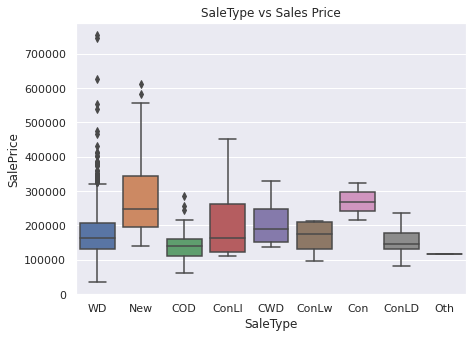

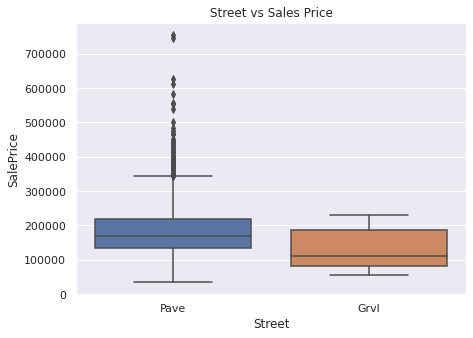

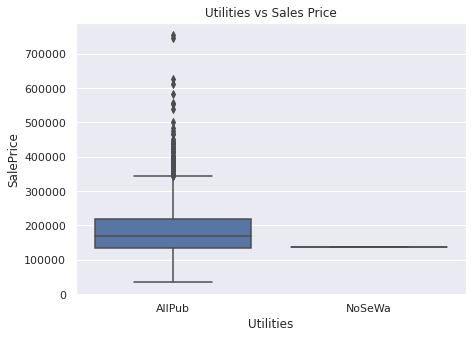

In [ ]:
for item in cat_list:
    plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
    sns.boxplot(x = item, y = 'SalePrice', data = housing_sales_data)
    plt.title(item + ' vs Sales Price')
    plt.show()

In [ ]:
#separating the features into dataframes
ames_num = housing_sales_data[numerical_features]
ames_cat = housing_sales_data[categorical_features]

In [ ]:
ames_num

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice,PerSquareFoot,Age
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,8,856.0,0.0,2003,2003,2008,208500.0,121.929825,5
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,6,1262.0,298.0,1976,1976,2007,181500.0,143.819334,31
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,6,920.0,0.0,2001,2002,2008,223500.0,125.139978,7
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,7,756.0,0.0,1915,1970,2006,140000.0,81.537566,91
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,9,1145.0,192.0,2000,2000,2008,250000.0,113.739763,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,7,953.0,0.0,1999,2000,2007,175000.0,106.253795,8
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,7,1542.0,349.0,1978,1988,2010,210000.0,101.302460,32
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,9,1152.0,0.0,1941,2006,2010,266500.0,113.888889,69
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,5,1078.0,366.0,1950,1996,2010,142125.0,131.841373,60


In [ ]:
ames_cat

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,None,1Fam,None,None,None,None,None,Y,Norm,Norm,...,None,Gilbert,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1375,None,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,...,None,NWAmes,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1376,None,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,...,Shed,Crawfor,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1377,None,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,...,None,NAmes,Y,None,CompShg,Hip,Normal,WD,Pave,AllPub


In [ ]:
df_yr = housing_sales_data[['YrSold', 'SalePrice']].groupby('YrSold').agg('mean')

df_yr2 = round(df_yr, 2)
df_yr3 = df_yr2.sort_values(by = 'YrSold', ascending = False)
df_yr3

,SalePrice
YrSold,
2010,182380.75
2009,183293.66
2008,183593.40
2007,189773.00
2006,186832.88


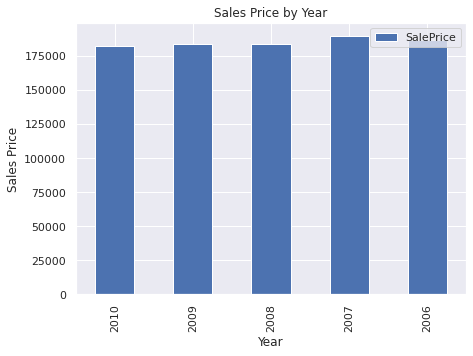

In [ ]:
df_yr3.plot(kind = 'bar')
plt.title("Sales Price by Year")
plt.xlabel("Year")
plt.ylabel("Sales Price")
plt.show()

In [ ]:
'''Looking at the average sale price by month and year sold'''
avgsaleprice = housing_sales_data.groupby(['MoSold', 'YrSold']).mean()['SalePrice']
print(avgsaleprice)

MoSold  YrSold
1       2006      201090.000000
        2007      195229.166667
        2008      196187.363636
        2009      201529.636364
        2010      167730.666667
2       2006      194322.222222
        2007      176301.750000
        2008      159370.000000
        2009      187450.000000
        2010      178989.285714
3       2006      190502.291667
        2007      176677.950000
        2008      186730.937500
        2009      181712.500000
        2010      203181.285714
4       2006      184247.750000
        2007      173844.090909
        2008      166244.652174
        2009      181680.769231
        2010      174775.472222
5       2006      161034.459459
        2007      173342.951220
        2008      193394.722222
        2009      170027.685714
        2010      186778.818182
6       2006      177668.888889
        2007      181324.534483
        2008      174276.625000
        2009      185638.508772
        2010      184072.142857
7       2006      186720.

## **Feature Engineering**

### Remove Feature

In [ ]:
def drop_attributes(df):
    df.drop(['Alley'],axis=1,inplace=True)
    df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
    return(df)
housing_sales_data = drop_attributes(housing_sales_data)
print("data_shape:", housing_sales_data.shape)

# id is removed from test, add later

data_shape: (1379, 78)


In [ ]:
cat_list.remove("Alley")
cat_list.remove("PoolQC")
cat_list.remove("Fence")
cat_list.remove("MiscFeature")

### Clean Outliers

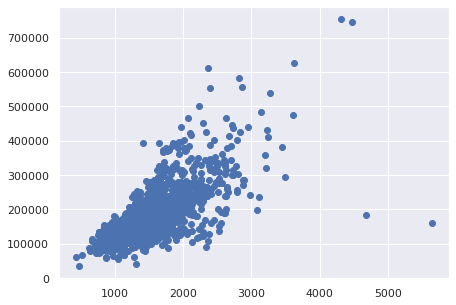

In [ ]:
plt.scatter(housing_sales_data['GrLivArea'],housing_sales_data['SalePrice']);

In [ ]:
# drop outlier: living area > 4000
housing_sales_data.drop(labels = housing_sales_data[housing_sales_data['GrLivArea']>4000].index,inplace = True)

In [ ]:
housing_sales_data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice,PerSquareFoot,Age
0,856.0,854.0,0.0,3,1Fam,TA,No,706.0,0.0,GLQ,...,8,856.0,AllPub,0.0,2003,2003,2008,208500.0,121.929825,5
1,1262.0,0.0,0.0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0,143.819334,31
2,920.0,866.0,0.0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,6,920.0,AllPub,0.0,2001,2002,2008,223500.0,125.139978,7
3,961.0,756.0,0.0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,7,756.0,AllPub,0.0,1915,1970,2006,140000.0,81.537566,91
4,1145.0,1053.0,0.0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0,113.739763,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,1Fam,None,None,0.0,0.0,None,...,7,953.0,AllPub,0.0,1999,2000,2007,175000.0,106.253795,8
1375,2073.0,0.0,0.0,3,1Fam,TA,No,790.0,163.0,ALQ,...,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0,101.302460,32
1376,1188.0,1152.0,0.0,4,1Fam,Gd,No,275.0,0.0,GLQ,...,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0,113.888889,69
1377,1078.0,0.0,0.0,2,1Fam,TA,Mn,49.0,1029.0,GLQ,...,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0,131.841373,60


In [ ]:
def convert_categorical(category, df):
    s = str(category)
    df = pd.get_dummies(df, columns=[s])
    return df

In [ ]:
cat_list

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [ ]:
def encode_df(df):
    df_encoded = convert_categorical(cat_list[0], df)
    for i in range(len(cat_list)-2):
      df_encoded = convert_categorical(cat_list[i+1], df_encoded)
    df_encoded1 = convert_categorical(cat_list[-1], df_encoded)
    return(df_encoded1)

In [ ]:
ames_encoded = encode_df(housing_sales_data)

In [ ]:
ames_encoded.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0


In [ ]:
train_cols=[]
for col in ames_encoded.columns:
    train_cols.append(col)
train_cols

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'SalePrice',
 'PerSquareFoot',
 'Age',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_None',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_None',
 'BsmtFinType1_Rec',
 'BsmtFinType2_ALQ',
 'BsmtFinTy

In [ ]:
ames_encoded['SalePrice'].values

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [ ]:
train, test = train_test_split(ames_encoded, test_size=0.20, random_state=1)

In [ ]:
train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1231,1616.0,0.0,0.0,3,0.0,0.0,0,0,1616.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1088,816.0,0.0,0.0,2,538.0,0.0,0,0,278.0,96.0,...,0,0,0,0,0,1,0,1,1,0
148,1232.0,0.0,0.0,3,660.0,0.0,0,0,572.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1182,874.0,0.0,0.0,3,510.0,0.0,1,0,354.0,0.0,...,0,0,0,0,0,1,0,1,1,0
478,1218.0,0.0,0.0,2,27.0,0.0,0,0,1191.0,0.0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1268.0,1097.0,0.0,3,1163.0,0.0,1,0,89.0,0.0,...,0,0,0,0,0,1,0,1,1,0
907,696.0,720.0,0.0,3,604.0,0.0,1,0,92.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1098,1258.0,0.0,0.0,0,1198.0,0.0,2,0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
235,1302.0,0.0,0.0,3,270.0,580.0,0,1,452.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
X_train, y_train= train.drop('SalePrice', axis=1), train['SalePrice']
print(X_train.shape)
print(y_train.shape)

X_test, y_test = test.drop('SalePrice', axis=1), test["SalePrice"]
print(X_test.shape)
print(y_test.shape)

(1100, 278)
(1100,)
(275, 278)
(275,)


In [ ]:
#sale_price = ames_encoded['SalePrice'].values # make a copy for later
X_train_scaler = MinMaxScaler()
X_test_scaler = MinMaxScaler()
X_train = pd.DataFrame(X_train_scaler.fit_transform(X_train), columns = X_train.columns)
y_train = y_train.values.reshape(-1,1)
X_test = pd.DataFrame(X_test_scaler.fit_transform(X_test), columns = X_test.columns)
y_test = y_test.values.reshape(-1,1)

In [ ]:
y_train

array([[232000.],
       [120500.],
       [162500.],
       ...,
       [108959.],
       [158000.],
       [115000.]])

In [ ]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0.422222,0.00000,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.691781,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.135484,0.00000,0.0,0.333333,0.245887,0.000000,0.0,0.0,0.119007,0.173913,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.284588,0.00000,0.0,0.500000,0.301645,0.000000,0.0,0.0,0.244863,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.156272,0.00000,0.0,0.500000,0.233090,0.000000,0.5,0.0,0.151541,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.279570,0.00000,0.0,0.333333,0.012340,0.000000,0.0,0.0,0.509846,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.297491,0.60341,0.0,0.500000,0.531536,0.000000,0.5,0.0,0.038099,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1096,0.092473,0.39604,0.0,0.500000,0.276051,0.000000,0.5,0.0,0.039384,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1097,0.293907,0.00000,0.0,0.000000,0.547532,0.000000,1.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1098,0.309677,0.00000,0.0,0.500000,0.123400,0.514641,0.0,0.5,0.193493,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train_batch = np.array_split(X_train, 10) 
train_label_batch = np.array_split(y_train, 10) 

test_batch = np.array_split(X_test, 5)
test_label_batch = np.array_split(y_test, 5)


In [ ]:
train_batch

[tensor([[0.4222, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.1355, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.2846, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         ...,
         [0.1412, 0.4576, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.4093, 0.4873, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.1039, 0.4004, 0.0000,  ..., 1.0000, 0.0000, 0.0000]]),
 tensor([[0.3742, 0.4290, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.3498, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.0161, 0.2772, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         ...,
         [0.1090, 0.4081, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.1466, 0.6117, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.1444, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000]]),
 tensor([[0.1297, 0.4576, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.2208, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         [0.3384, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.

In [ ]:
# convert to torch
for i in range(len(train_batch)):
  train_batch[i] = torch.from_numpy(train_batch[i].values).float()

for i in range(len(train_label_batch)):
  train_label_batch[i] = torch.from_numpy(train_label_batch[i]).float().view(-1, 1)
    
for i in range(len(test_batch)):
  test_batch[i] = torch.from_numpy(test_batch[i].values).float()

for i in range(len(test_label_batch)):
  test_label_batch[i] = torch.from_numpy(test_label_batch[i]).float().view(-1, 1)

In [ ]:
print(len(train_batch),type(train_batch))
print(len(train_label_batch),type(train_label_batch))
print(len(test_batch),type(test_batch))
print(len(test_label_batch),type(test_label_batch))

10 <class 'list'>
10 <class 'list'>
5 <class 'list'>
5 <class 'list'>


In [ ]:
input_size = 278
hidden_size_1 = 150
hidden_size_2 = 100
output_size = 1

epochs = 200
learning_rate = 0.001

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
      
    self.fc1 = nn.Linear(278, 150)
    self.fc2 = nn.Linear(150, 100)
    self.fc3 = nn.Linear(100, 1)

  def forward(self, x):
        
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x

In [ ]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model

Model(
  (fc1): Linear(in_features=278, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
train_batch[1].shape

torch.Size([110, 278])

In [ ]:
epochs = 300
train_losses = []
test_losses = []
train_predictions = []
train_true_values = []
for e in range(epochs):
  train_corr = 0
  test_corr = 0
  total_loss= 0
  for i in range(len(train_batch)):
    y_pred = model(train_batch[i])
    train_predictions.append(y_pred)
    train_true_values.append(train_label_batch[i])
    #predictions = y_train_scaler.inverse_transform(y_pred.detach().numpy())
    #real = y_train_scaler.inverse_transform(train_label_batch[i].detach().numpy())
    loss =  torch.sqrt(criterion(y_pred, train_label_batch[i]))
    total_loss += loss
    
    # Update parameters
    optimizer.zero_grad() # reset the gradients after each training step
    loss.backward() # to trigger backprop
    optimizer.step() # perform parameter update

    if i%10 == 0:
      print(f"epoch: {e+1} Train loss: {total_loss.item()/110}")
  
  # Update train loss & accuracy for the epoch
  train_losses.append(total_loss.item()/1100)

  # Run the testing batches
  total_loss= 0
  test_predictions= []
  test_true_values= []
  with torch.no_grad(): # don't calculate gradients during testing
    for j in range(len(test_batch)):
    
      # Apply the model

      y_val = model(test_batch[j])
      test_predictions.append(y_val)
      test_true_values.append(test_label_batch[j])

      # Update test loss & accuracy for the epoch 
      loss = torch.sqrt(criterion(y_val, test_label_batch[j]))
      total_loss += loss

      if j%5 == 0:
        print(f"epoch: {e+1} Test loss: {total_loss.item()/55}")

    test_losses.append(total_loss.item()/275)
        

epoch: 1 Train loss: 1943.1646306818182
epoch: 1 Test loss: 3039.447727272727
epoch: 2 Train loss: 1943.1501420454545
epoch: 2 Test loss: 3039.338068181818
epoch: 3 Train loss: 1943.097443181818
epoch: 3 Test loss: 3039.06875
epoch: 4 Train loss: 1942.9677556818183
epoch: 4 Test loss: 3038.5201704545457
epoch: 5 Train loss: 1942.7032670454546
epoch: 5 Test loss: 3037.5323863636363
epoch: 6 Train loss: 1942.2271306818182
epoch: 6 Test loss: 3035.90625
epoch: 7 Train loss: 1941.4428977272728
epoch: 7 Test loss: 3033.409943181818
epoch: 8 Train loss: 1940.2387784090909
epoch: 8 Test loss: 3029.7892045454546
epoch: 9 Train loss: 1938.4921875
epoch: 9 Test loss: 3024.7704545454544
epoch: 10 Train loss: 1936.0708806818182
epoch: 10 Test loss: 3018.063352272727
epoch: 11 Train loss: 1932.8353693181818
epoch: 11 Test loss: 3009.3678977272725
epoch: 12 Train loss: 1928.6407670454546
epoch: 12 Test loss: 2998.3681818181817
epoch: 13 Train loss: 1923.3356534090908
epoch: 13 Test loss: 2984.755397

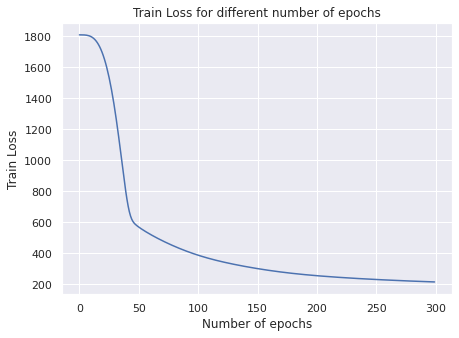

In [ ]:
with torch.no_grad():
  plt.plot(train_losses)
  plt.title("Train Loss for different number of epochs")
  plt.xlabel("Number of epochs")
  plt.ylabel("Train Loss")

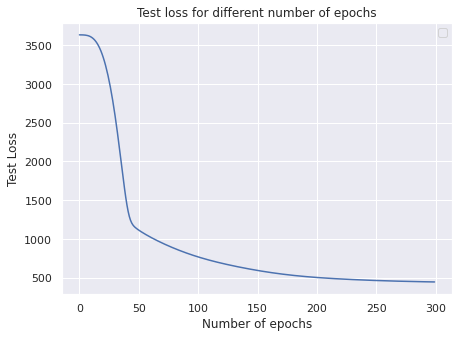

In [ ]:
with torch.no_grad():
  plt.plot(test_losses)
  plt.title("Test loss for different number of epochs")
  plt.xlabel("Number of epochs")
  plt.ylabel("Test Loss")
  plt.legend()

In [ ]:
test_prediction_list= []
for i in test_predictions:
  for j in i:
    test_prediction_list.append(j.item())

In [ ]:
test_true_values_list = []
for i in test_true_values:
  for j in i:
    test_true_values_list.append(j.item())

In [ ]:
test_prediction_array = np.array(test_prediction_list)
test_true_values_array = np.array(test_true_values_list)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
##% evaluateRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluateRegressor(true,predicted,message = "Test set"):
    mape = np.mean(np.abs(predicted - true)/np.abs(true))  # MAPE
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    LogRMSE = mean_squared_error(np.log(true),np.log(predicted),squared = False)
    r2 = r2_score(true, predicted)
    print(message)
    print("r2", r2)
    print("MAPE", mape)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("LogRMSE:", LogRMSE)

In [ ]:
evaluateRegressor(test_true_values_array, test_prediction_array)

Test set
r2 0.891566024281171
MAPE 0.0973034091945444
MSE: 615274882.0344918
MAE: 17284.586875
RMSE: 24804.73507285437
LogRMSE: 0.1259955530377996


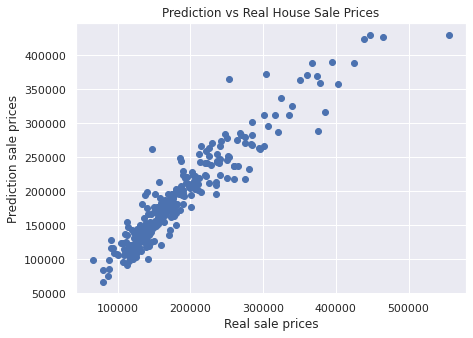

In [ ]:
plt.scatter(test_true_values_list,test_prediction_list)
plt.xlabel("Real sale prices")
plt.ylabel("Prediction sale prices")
plt.title("Prediction vs Real House Sale Prices")
plt.show()

In [ ]:
for i in range(len(test_true_values_list)):
  print(f"true value: {test_true_values_list[i]}, prediction_value: {test_prediction_list[i]}")

true value: 174000.0, prediction_value: 175165.78125
true value: 162000.0, prediction_value: 165591.4375
true value: 116000.0, prediction_value: 121243.1875
true value: 143000.0, prediction_value: 140798.109375
true value: 153000.0, prediction_value: 168757.375
true value: 200100.0, prediction_value: 177099.75
true value: 113000.0, prediction_value: 135735.15625
true value: 141000.0, prediction_value: 166149.0625
true value: 151500.0, prediction_value: 155387.0
true value: 110000.0, prediction_value: 111156.171875
true value: 198500.0, prediction_value: 210907.65625
true value: 115000.0, prediction_value: 107069.5625
true value: 126175.0, prediction_value: 118611.8203125
true value: 176000.0, prediction_value: 167831.203125
true value: 153900.0, prediction_value: 175845.28125
true value: 126500.0, prediction_value: 127736.3125
true value: 205950.0, prediction_value: 221446.90625
true value: 170000.0, prediction_value: 172117.40625
true value: 139000.0, prediction_value: 152447.78125
tr

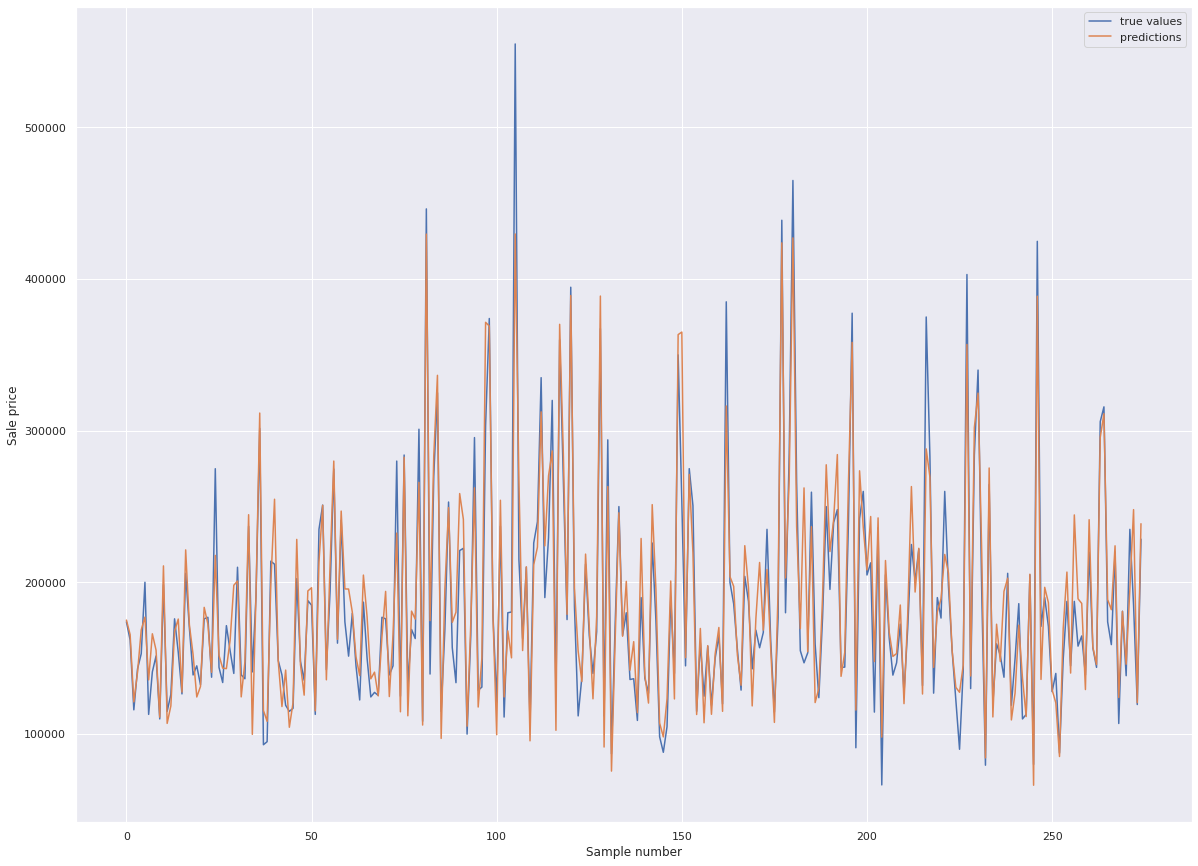

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 15))
plt.plot(range(275),test_true_values_list, label = "true values")
plt.plot(range(275),test_prediction_list, label= "predictions")
plt.xlabel("Sample number")
plt.ylabel("Sale price")
plt.legend()